<a href="https://colab.research.google.com/github/ninayang2019/Machine-Learning/blob/master/Portfolio_Optimization%2C_Shini_Yang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part A: Portfoio Optimization

### 1. Assume that the returns for the 6 stocks follow a multivariate Normal distribution, i.e., 𝑁(𝜇, Σ). Compute/Estimate 𝜇 and Σ.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import cvxpy as cvx
from numpy import matrix 
from cvxpy import *

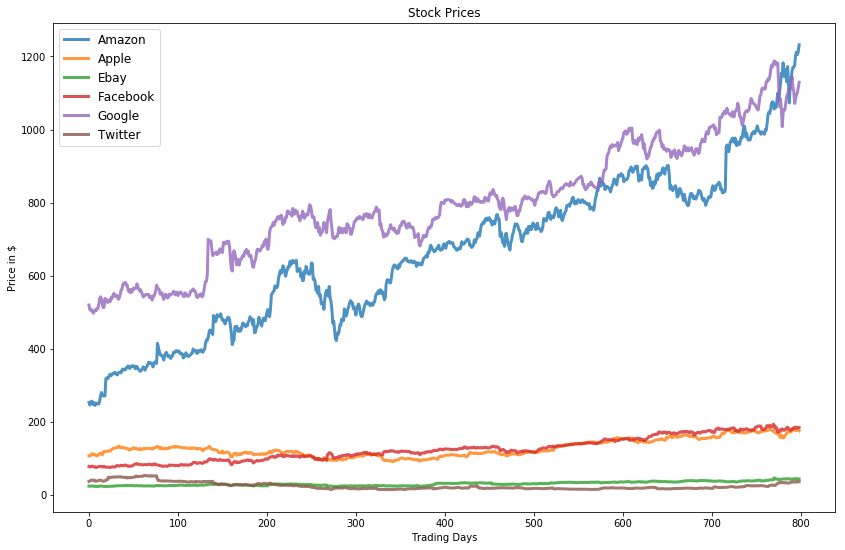

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/ormarketing/finance/master/datahomework2.csv')
df.head()
plt.figure(figsize=(14,9))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.title('Stock Prices')
plt.ylabel('Price in $')
plt.xlabel('Trading Days')
plt.show()

In [3]:
#Append to the dataframe the returns r_{it}
df['Amazon_rr'] = (df.Amazon-df.Amazon.shift(1))/df.Amazon.shift(1)
df['Apple_rr'] = (df.Apple-df.Apple.shift(1))/df.Apple.shift(1)
df['Ebay_rr'] = (df.Ebay-df.Ebay.shift(1))/df.Ebay.shift(1)
df['Facebook_rr'] = (df.Facebook-df.Facebook.shift(1))/df.Facebook.shift(1)
df['Google_rr'] = (df.Google-df.Google.shift(1))/df.Google.shift(1)
df['Twitter_rr'] = (df.Twitter-df.Twitter.shift(1))/df.Twitter.shift(1)
df.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter,Amazon_rr,Apple_rr,Ebay_rr,Facebook_rr,Google_rr,Twitter_rr
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001,NaN,NaN,NaN,NaN,NaN,NaN
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999,-0.028097,0.000094,-0.012827,-0.013473,-0.024832,0.024739
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000,0.033924,0.014022,-0.001727,0.000000,-0.002764,0.048552
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998,0.008723,0.038422,0.027037,0.026592,0.003365,0.027628
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999,-0.010667,0.001073,-0.013828,-0.005565,-0.012231,-0.019915


In [0]:
# Using in-built geometric meanto estimate mu and variance covariance matrix
from scipy import stats
mu = stats.gmean(1+df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']])-1
Cov = np.matrix((df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']]).cov())

In [5]:
#Next, I redo the optimization
x=cvx.Variable(6)
#Cov=np.matrix(Cov)#I transform the estimated variance-covariance array as a matrix
R = 0.07/250
risk=quad_form(x, Cov)
rr=sum(mu*x)
prob1 = Problem(Minimize(risk), 
               [rr>=R,sum(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)

[0.20424961 0.19549438 0.16169989 0.17375783 0.18985696 0.07494132]


In [6]:
mu

array([ 1.98778605e-03,  6.25712686e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636078e-05])

In [7]:
Cov

matrix([[ 4.07197383e-04,  4.60871501e-06,  1.22772826e-05,
         -1.05667572e-05,  6.56723225e-06, -9.50143601e-05],
        [ 4.60871501e-06,  2.10803738e-04,  5.99369391e-05,
          6.94486102e-05,  6.00972702e-05,  4.03675884e-05],
        [ 1.22772826e-05,  5.99369391e-05,  2.92036867e-04,
          2.71083411e-05,  5.45848998e-05,  2.43589542e-05],
        [-1.05667572e-05,  6.94486102e-05,  2.71083411e-05,
          2.42364043e-04,  9.89613220e-05,  2.19275119e-05],
        [ 6.56723225e-06,  6.00972702e-05,  5.45848998e-05,
          9.89613220e-05,  2.02842223e-04,  9.65658927e-06],
        [-9.50143601e-05,  4.03675884e-05,  2.43589542e-05,
          2.19275119e-05,  9.65658927e-06,  1.07122641e-03]])

###2.What is the asset allocation that solves the following optimization problem, where R is the annual return that the investor wants to achieve, with 𝑅 = 0.07. <br>
The goal is to minimize risk of the portfolio with a constraint on the minimum returns.

\begin{align}
\text{Minimize} \quad \frac{1}{2} x^T & \Sigma x\\
\mu^T x &\geq R\\
\sum_{i=1}^5x_i&=1\\
x&\geq0
\end{align}

x is weight 
R is minimum return


In [14]:
import numpy as np
from scipy.optimize import minimize

# function to calculate the risk measure (riskm)
def riskm(x):
      """This is the risk measure. 1000 is used in front of the objective function to help the algorithm converge"""
      return 1000*0.5*(np.dot(np.dot(x,Cov),x.T)) 

x_init = matrix([1/6,1/6,1/6,1/6,1/6,1/6]) # initialize the allocation vector
#x_init=x.value
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons2={'type':'ineq','fun':lambda x:np.dot(x,mu.T).item(0)-R}
cons=(cons1,cons2)
bnds = ((0, 1),(0, None),(0, None),(0, None),(0, None),(0, None))

# Solving the optimization problem
sol = minimize(riskm,x_init,constraints=cons,bounds=bnds, tol=1e-2)
print("The optimal allocation for each stock is\n",sol.x)
print("The objective function value is\n",sol.fun)

The optimal allocation for each stock is
 [0.2012415  0.18120927 0.17703587 0.1805459  0.18330149 0.07666596]
The objective function value is
 0.03922138793279195


### 3. What is the asset allocation 𝑥 that solve the following optimization problem, where 𝛾 is the risk aversion coefficient of the investor with 𝛾 = 0.1, 𝛾 = 0.15 and 𝛾 = 0.2, as well as the value of the objective function.
\begin{align}
\text{Maximize} \quad\mu^T x -\gamma x^T & \Sigma x\\
\sum_{i=1}^5x_i&=1\\
x&\geq0
\end{align}

####Maximization Utility Function (Gamma = 0.1)

In [10]:
# function to calculate the risk measure (riskm)
def utility(x):
      """This is the utility"""
      return -(np.dot(mu.T,x)-gamma*(np.dot(np.dot(x.T,Cov),x))) 

#x_init = matrix([1/6,1/6,1/6,1/6,1/6,1/6]) # initialize the allocation vector
K=20
x=np.zeros(6)
x[0]=K/6
x[1]=K/6
x[2]=K/6
x[3]=K/6
x[4]=K/6
x[5]=K/6
gamma=0.1
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons=(cons1)
bnds = ((0, None),(0, None),(0, None),(0, None),(0, None),(0, None))
# Solving the optimization problem
#sol = minimize(riskm,x,constraints=cons,bounds=bnds,method="BFGS", tol=1e-2)
sol = minimize(utility,x,constraints=(cons1),bounds=bnds, tol=1e-6)
print("The optimal allocation for each stock is\n",sol.x)
print("The objective function value is\n",-sol.fun)
sol

The optimal allocation for each stock is
 [1.00000000e+00 0.00000000e+00 1.81929125e-16 2.35922393e-16
 1.89301699e-16 0.00000000e+00]
The objective function value is
 0.001947066308437759


     fun: -0.001947066308437759
     jac: array([-1.90634656e-03, -6.24790948e-04, -7.52270731e-04, -1.09030482e-03,
       -9.72289636e-04,  8.86071939e-06])
 message: 'Optimization terminated successfully.'
    nfev: 176
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([1.00000000e+00, 0.00000000e+00, 1.81929125e-16, 2.35922393e-16,
       1.89301699e-16, 0.00000000e+00])

#### Maximization Utility Function (Gamma = 0.15)

In [11]:
# function to calculate the risk measure (riskm)
def utility(x):
      """This is the utility"""
      return -(np.dot(mu.T,x)-gamma*(np.dot(np.dot(x.T,Cov),x))) 

#x_init = matrix([1/6,1/6,1/6,1/6,1/6,1/6]) # initialize the allocation vector
K=20
x=np.zeros(6)
x[0]=K/6
x[1]=K/6
x[2]=K/6
x[3]=K/6
x[4]=K/6
x[5]=K/6
gamma=0.15
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons=(cons1)
bnds = ((0, None),(0, None),(0, None),(0, None),(0, None),(0, None))
# Solving the optimization problem
#sol = minimize(riskm,x,constraints=cons,bounds=bnds,method="BFGS", tol=1e-2)
sol = minimize(utility,x,constraints=(cons1),bounds=bnds, tol=1e-6)
print("The optimal allocation for each stock is\n",sol.x)
print("The objective function value is\n",-sol.fun)
sol

The optimal allocation for each stock is
 [0.89782895 0.         0.         0.10217105 0.         0.        ]
The objective function value is
 0.001846548738604337


     fun: -0.001846548738604337
     jac: array([-1.87843185e-03, -6.22342632e-04, -7.50588384e-04, -1.08360883e-03,
       -9.68800901e-04,  2.94373604e-06])
 message: 'Optimization terminated successfully.'
    nfev: 144
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.89782895, 0.        , 0.        , 0.10217105, 0.        ,
       0.        ])

#### Maximization Utility Function (Gamma = 0.2)

In [12]:
# function to calculate the risk measure (riskm)
def utility(x):
      """This is the utility"""
      return -(np.dot(mu.T,x)-gamma*(np.dot(np.dot(x.T,Cov),x))) 

#x_init = matrix([1/6,1/6,1/6,1/6,1/6,1/6]) # initialize the allocation vector
K=20
x=np.zeros(6)
x[0]=K/6
x[1]=K/6
x[2]=K/6
x[3]=K/6
x[4]=K/6
x[5]=K/6
gamma=0.2
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons=(cons1)
bnds = ((0, None),(0, None),(0, None),(0, None),(0, None),(0, None))
# Solving the optimization problem
#sol = minimize(riskm,x,constraints=cons,bounds=bnds,method="BFGS", tol=1e-2)
sol = minimize(utility,x,constraints=(cons1),bounds=bnds, tol=1e-6)
print("The optimal allocation for each stock is\n",sol.x)
print("The objective function value is\n",-sol.fun)
sol

The optimal allocation for each stock is
 [8.97369110e-01 3.43475248e-16 2.55763292e-16 1.02630890e-01
 5.55111512e-17 0.00000000e+00]
The objective function value is
 0.0018297576811791734


     fun: -0.0018297576811791734
     jac: array([-1.84205730e-03, -6.21207364e-04, -7.49206403e-04, -1.08203478e-03,
       -9.67183194e-04, -5.34139690e-06])
 message: 'Optimization terminated successfully.'
    nfev: 144
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([8.97369110e-01, 3.43475248e-16, 2.55763292e-16, 1.02630890e-01,
       5.55111512e-17, 0.00000000e+00])

### 3. Simulation <br>
Based on the optimal allocations 𝑥∗ obtained in the two questions above, 𝜇 and 𝛴, please simulate the value of your portfolio after 300 trading days assuming that you have invested $100,000. <br>
• Report the mean and the variance of the portfolio in a table <br>
• Provide visualizations of your results. <br>

In [17]:
#Assume gamma = 0.2
T = 300 # you have 300 days 
m=6
B=100000
mu=mu
Cov=Cov
y = np.zeros((T+1,m))
y[0]=[sol.x[0],sol.x[1],sol.x[2],sol.x[3],sol.x[4],sol.x[5]] #x value is the weight of $100,000 invested in each stock
for i in range(T):
    rr=np.random.multivariate_normal(mu,Cov)
    y[i+1]=y[i]*(1+rr)
np.sum(y[T]*B) # here we have sum because rr goes from day 1 to day 300 so B*(1+rr) for each day and 

163181.73239128824

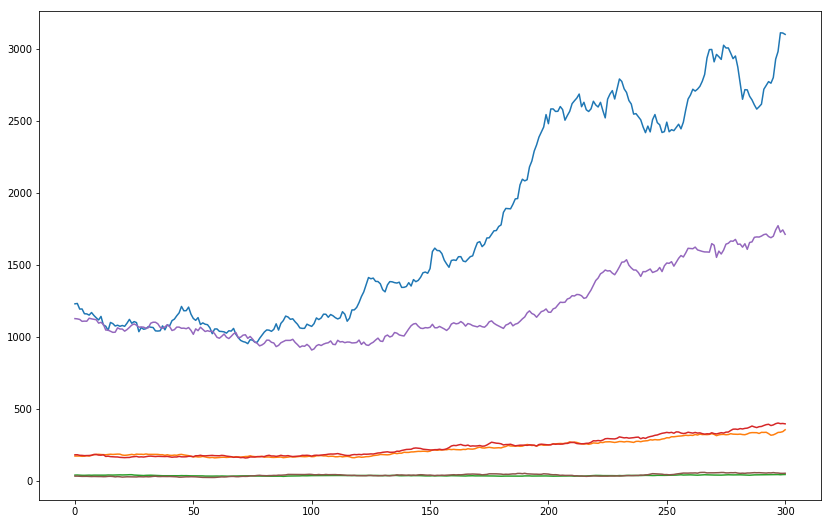

In [18]:
y[0]=list(df.iloc[798,:6].values) # set the initial price to the latest price in df
for i in range(T):
    rr=np.random.multivariate_normal(mu,Cov)
    y[i+1]=y[i]*(1+rr)
plt.figure(figsize=(14,9))
plt.plot(y)
plt.show()

In [22]:
simu = pd.DataFrame(y, columns=['Amazon', 'Apple', 'Ebay', 'Facebook', 'Google', 'Twitter'])

#Here we append to the dataframe the returns r_{it}
simu['Amazon_rr'] = (simu.Amazon-simu.Amazon.shift(1))/simu.Amazon.shift(1)
simu['Apple_rr'] = (simu.Apple-simu.Apple.shift(1))/simu.Apple.shift(1)
simu['Ebay_rr'] = (simu.Ebay-simu.Ebay.shift(1))/simu.Ebay.shift(1)
simu['Facebook_rr'] = (simu.Facebook-simu.Facebook.shift(1))/simu.Facebook.shift(1)
simu['Google_rr'] = (simu.Google-simu.Google.shift(1))/simu.Google.shift(1)
simu['Twitter_rr'] = (simu.Twitter-simu.Twitter.shift(1))/simu.Twitter.shift(1)

mu_simu = stats.gmean(1+simu.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']])-1
Cov_simu = matrix((simu.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']]).cov())

simu_result = pd.DataFrame({"Stock":['Amazon', 'Apple', 'Ebay', 'Facebook', 'Google', 'Twitter'], 
              'weight':sol.x,
              'mean':mu_simu,
              'variance':np.diag(Cov_simu)})
simu_result.head()

,Stock,weight,mean,variance
0,Amazon,0.201241,0.003084,0.000434
1,Apple,0.181209,0.002384,0.000198
2,Ebay,0.177036,0.000307,0.000275
3,Facebook,0.180546,0.002584,0.000244
4,Google,0.183301,0.001393,0.000212


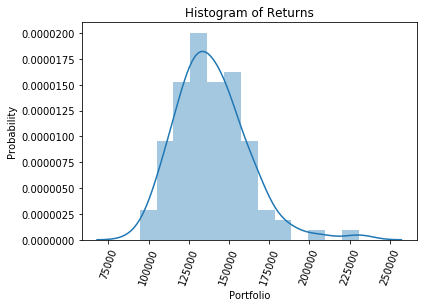

In [23]:
# Simulation 100 paths
simu=100 
T = 300 # 300 trading days
m=6 # 6 assets
B=100000 # Budget= $100,000
z_values = []
for q in range(simu):
   y = np.zeros((T+1,m))
   y[0]=[sol.x[0],sol.x[1],sol.x[2],sol.x[3],sol.x[4],sol.x[5]] #x value is the weight of $100,000 invested in each stock
   for i in range(T):
       rr=np.random.multivariate_normal(mu,Cov)
       y[i+1]=y[i]*(1+rr)
   z_values.append(np.sum(y[T])*B)

sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.xticks(rotation=70)
plt.title('Histogram of Returns')
plt.show()

## Plan B

### 1.Suppose you can charge any prices you like, what prices should be charged in each market to maximize profit? What are the corresponding demands and profit contributions of each market?

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy
from math import *
from scipy import *
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

In [30]:
#For Walnut Creek,  profit = return -(10000-800*pw)*(pw-cost)
cost = 5 

def profit(pw):
    """This is the negative profit function"""
    return -(10000-800*pw)*(pw-cost)

res = minimize_scalar(profit) # The routine is coded as mininization
p_wc = res.x
print(round(-res.fun,2)) # Return the profit level at the optimal price
print(f'This is the optimal price at Walnut Creek: {round(p_wc,2)}') # This is the optimal price
print(f'This is the demand of walnut creek at optimum price: {10000-800*res.x}')

11250.0
This is the optimal price at Walnut Creek: 8.75
This is the demand of walnut creek at optimum price: 2999.9999999999955


In [31]:
# For scottdale, profit = return -(8000-500*ps)*(ps-cost)
cost = 5 
def profit(ps):
    """This is the negative profit function"""
    return -(8000-500*ps)*(ps-cost)

res = minimize_scalar(profit) # The routine is coded as mininization
p_s = res.x
print(round(-res.fun,2)) # Return the profit level at the optimal price
print(f'This is the optimal price at Scottsdale: {round(p_s,2)}') # This is the optimal price
print(f'This is the demand of scott dale at optimum price: {8000-500*res.x}')

15125.0
This is the optimal price at Scottsdale: 10.5
This is the demand of scott dale at optimum price: 2750.000000000002


### 2. Smart Cookie discovers a way to transport cases from Walnut Creek to Scottsdale for $0.5 each. He then buys cases in Walnut Creek and ships them to Scottsdale to sell them. Assuming that you do not (or cannot) change your prices from those given in question 1, what will be the optimal price for Smart Cookie to sell cases in Scottsdale? How many will he sell? What will his total profit be? (Assume that Scottsdale customers will buy cases from the cheapest vendor). What will happen to your total sales and profit? (Remember that you are now selling to Smart Cookie, i.e., you cannot prevent him from buying from you in Walnut Creek).

In [32]:
#smart cookie
cost_sc = p_wc+0.5 #cost in walnut creek + 0.5 transportation

def profit(ps_sc):
    """This is the negative profit function"""
    return -(8000-500*ps_sc)*(ps_sc-cost_sc)

res = minimize_scalar(profit) # The routine is coded as mininization
p_sc = res.x
print(round(-res.fun,2)) # Return the profit level at the optimal price
print(f'This is the optimal price at Scottsdale: {round(p_sc,2)}') # This is the optimal price


5695.31
This is the optimal price at Scottsdale: 12.62


#### Obviously 12.62 is not a competetive price at scottdale as there is a lower price as 10.5 there. In this case, at most somart cookies can set the price as 10.5 to gain a share in the market. The demand at this price for smart cookie would be 8000-500*10.5=2750, and the profit of smart cookie would be 2750*(10.5-5.5) = 13750. Generally I don't think  I would totally lose the market share if smart cookie set the same price as I do, but lacking of the market share information, I couldn't calculate my earning in scottsdale. But here I would just assume it as 0. In this case, My sales at walnut creek  would still be 2999.999*8.75 = 26239.999, and my profit wouls still at least to be 11250 as my sales in walnut creek is guaranteed to meet the demand curve. As for the sales in Scootsdale, I don't know about it yet. All difference price is possible, even if it's just one cent less than mine that smart cookie's price is, would take away all the demand from me. As long as the sales return he got here can offset his cost from purchasing in walnut creek plus the shipping fee, then he would go for it. Even just set the priceat 10.5, he is still gaining a huge profit. 

### 3. You want the eliminate the Smart Cookie’s arbitrage opportunity by ensuring that your price in Scottsdale is no more than $0.05 more than the selling price in Walnut Creek (and vice versa). What is your new selling price in each city? What are your corresponding sales and profit?


In [41]:
cost = 5 
# Because in Scottsdale, if my price is set below 10.5, the higher the price, the more profit, 
# so I will set my price in Scottsdale = price in Walnut Creek + 0.05
def total_profit(pw):
    """This is the negative profit function"""
    return -((10000-800*pw)*(pw-cost)+(8000-500*(pw+0.05))*((pw+0.05)-cost))

res = minimize_scalar(total_profit)
p_t = res.x
print(f'My total Profit will be: {round(-res.fun,2)}') # Return the profit level at the optimal price
print(f'This is the optimal price at Walnut Creek: {round(p_t,2)} and my optimal price at Scottsdale is {round(p_t+0.05,2)}') # This is the optimal price
print(f'My sales quantity in Walnut Creek will be {round (10000-800*p_t,0) }')
print(f'My sales quantityin Scottsdale will be {round(8000-500*(p_t+0.05),0)}')

My total Profit will be: 25485.77
This is the optimal price at Walnut Creek: 9.4 and my optimal price at Scottsdale is 9.45
My sales quantity in Walnut Creek will be 2477.0
My sales quantityin Scottsdale will be 3273.0


####4. From among the Walnut Creek buyers, the Scottsdale buyers and you, who wins and who lose from the threat of arbitrage?

It somewhat depends on the price that the avitrager is setting in the different market. For local walnut creek buyers, as my demand is not being threatened here in this market, for the short-time I would not increase price so Walnut Creek buyers would be fine unless the abitrager are taking too many products from local supply then inevitably the product would go to people who is willing to pay higher for it. 
For Scottes buyer, they may gain advantage by having two competitors reducing each's price to gain their own market shares. If the price competition happen, the customers would be happy as their demand curve might go up. 
For me, my profit of two locations added up to be 26375. But it would relatively reduce as the price smart cookie set is going down from 10.5 to his offset point 9.25. He would still be gaining profit, and my profit would be reducing from 26375 to 11250, where he took over the whole scottsdale market